# <center>Anomaly detection

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat
from scipy import stats

In [2]:
data = loadmat('ex8data1.mat')  
X = data['X']   
X.shape

(307, 2)

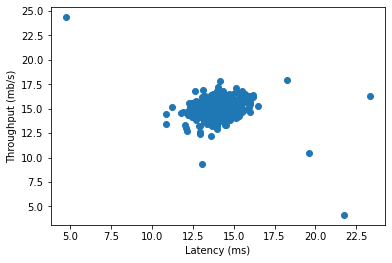

In [3]:
plt.scatter(X.T[0], X.T[1])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

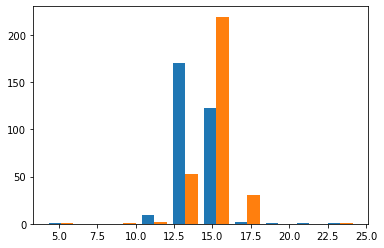

In [4]:
plt.hist(X)
plt.show()

### Gaussian distribution

In [5]:
def estimate_gaussian(X):
    mu = []
    sigma = []
    for i in X.T:
        mu.append(i.mean())
        sigma.append(i.var())
    return mu, sigma


mu, sigma = estimate_gaussian(X)

### Calculate probability

In [6]:
Xval = data['Xval']  
yval = data['yval']
Xval.shape

(307, 2)

In [7]:
dist = stats.norm(mu[0], sigma[0])
dist.pdf(X[:,0])[0:50]

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ,
       0.21716057, 0.21760472, 0.20141857, 0.20157497, 0.21711385,
       0.21758775, 0.21695576, 0.2138258 , 0.21057069, 0.1173018 ,
       0.20765108, 0.21717452, 0.19510663, 0.21702152, 0.17429399,
       0.15413455, 0.21000109, 0.20223586, 0.21031898, 0.21313426,
       0.16158946, 0.2170794 , 0.17825767, 0.17414633, 0.1264951 ,
       0.19723662, 0.14538809, 0.21766361, 0.21191386, 0.21729442,
       0.21238912, 0.18799417, 0.21259798, 0.21752767, 0.20616968,
       0.21520366, 0.1280081 , 0.21768113, 0.21539967, 0.16913173])

In [8]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])

In [9]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])

### Selecting the threshold

In [10]:
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0

    step = (pval.max() - pval.min()) / 10000

    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon

        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)

        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_epsilon, best_f1

epsilon, f1 = select_threshold(pval, yval)
epsilon, f1

/tmp/ipykernel_47349/484194870.py:14: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)


(0.009566706005956842, 0.7142857142857143)

### Anomaly detection result

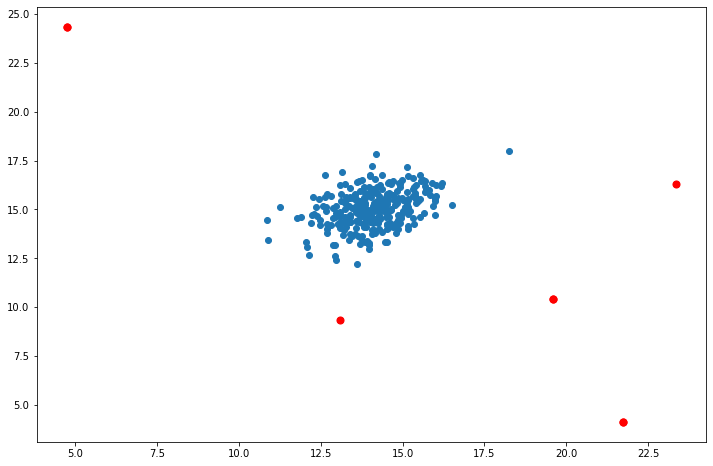

In [11]:
outliers = np.where(p < epsilon)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')

plt.show()